In [5]:
# --- Step 1: Upload file ---
from google.colab import files
uploaded = files.upload()

# --- Step 2: Detect file name automatically ---
import os
file_list = list(uploaded.keys())   # list of uploaded files
print("Uploaded files:", file_list)

if len(file_list) == 0:
    raise ValueError("No file uploaded! Please upload your CSV.")

file_name = file_list[0]   # first file
print("Using file:", file_name)

# --- Step 3: Load CSV with fallback encodings ---
import pandas as pd

try:
    df = pd.read_csv(file_name, low_memory=False)
    print("Loaded using default encoding.")
except:
    try:
        df = pd.read_csv(file_name, encoding='latin1', low_memory=False)
        print("Loaded using latin1 encoding.")
    except:
        df = pd.read_csv(file_name, encoding='ISO-8859-1', low_memory=False)
        print("Loaded using ISO-8859-1 encoding.")

# --- Step 4: Preview dataset ---
df.head()


Saving geocode_health_centre.csv to geocode_health_centre (1).csv
Uploaded files: ['geocode_health_centre (1).csv']
Using file: geocode_health_centre (1).csv
Loaded using default encoding.


,State Name,District Name,Subdistrict Name,Facility Type,Facility Name,Facility Address,Latitude,Longitude,ActiveFlag_C,NOTIONAL_PHYSICAL,Location Type,Type Of Facility,Nin_N
0,A & N Islands,Nicobar,Nancowry,chc,CHC Nancowry,Kamorta,7.96109,93.5589,Y,Physical,Rural,Public,NaN
1,A & N Islands,South Andaman,Ferrargunj,chc,CHC Bambooflat,NaN,11.7303,92.65003,Y,Physical,Rural,Public,NaN
2,A & N Islands,North and Middle Andaman,Rangat,chc,CHC Rangat,NaN,12.71609,92.90579,Y,Physical,Rural,Public,NaN
3,A & N Islands,North and Middle Andaman,Diglipur,chc,CHC Diglipur,NaN,13.30682,92.9411,Y,Physical,Rural,Public,NaN
4,A & N Islands,Nicobar,Car Nicobar,dis_h,BJR Hospital,NaN,9.14893,92.75578,Y,Physical,Rural,Public,NaN


In [6]:
# STEP 3 — Create all 10 tables

# 1. State Table
state_table = df[['State Name']].drop_duplicates().reset_index(drop=True)

# 2. District Table
district_table = df[['State Name','District Name']].drop_duplicates().reset_index(drop=True)

# 3. Subdistrict Table
subdistrict_table = df[['State Name','District Name','Subdistrict Name']].drop_duplicates().reset_index(drop=True)

# 4. Facility Type Table
facility_type_table = df[['Facility Type']].drop_duplicates().reset_index(drop=True)

# 5. Facility Master Table
facility_master_table = df[['Facility Name','Facility Address','Type Of Facility','ActiveFlag_C']].drop_duplicates().reset_index(drop=True)

# 6. Location Table
location_table = df[['Facility Name','Latitude','Longitude','Location Type']].drop_duplicates().reset_index(drop=True)

# 7. Ownership Table
ownership_table = df[['Type Of Facility']].drop_duplicates().reset_index(drop=True)

# 8. Physical / Notional Table
physical_table = df[['NOTIONAL_PHYSICAL']].drop_duplicates().reset_index(drop=True)

# 9. Administrative Mapping Table
admin_mapping_table = df[['State Name','District Name','Subdistrict Name','Facility Name']].drop_duplicates().reset_index(drop=True)

# 10. Full Master Table
full_master_table = df.copy()

print("10 tables created successfully!")


10 tables created successfully!


In [7]:
# STEP 4 — Save 10 tables to CSV

state_table.to_csv("table_state.csv", index=False)
district_table.to_csv("table_district.csv", index=False)
subdistrict_table.to_csv("table_subdistrict.csv", index=False)
facility_type_table.to_csv("table_facility_type.csv", index=False)
facility_master_table.to_csv("table_facility_master.csv", index=False)
location_table.to_csv("table_location.csv", index=False)
ownership_table.to_csv("table_ownership.csv", index=False)
physical_table.to_csv("table_physical_notional.csv", index=False)
admin_mapping_table.to_csv("table_admin_mapping.csv", index=False)
full_master_table.to_csv("table_full_master.csv", index=False)

print("All 10 tables saved successfully!")


All 10 tables saved successfully!


In [8]:
# STEP 5 — Load master table for machine learning

import pandas as pd

df_master = pd.read_csv("table_full_master.csv")

print("Master Table Loaded")
print(df_master.shape)
df_master.head()


Master Table Loaded
(200438, 13)


/tmp/ipython-input-1236899421.py:5: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_master = pd.read_csv("table_full_master.csv")


,State Name,District Name,Subdistrict Name,Facility Type,Facility Name,Facility Address,Latitude,Longitude,ActiveFlag_C,NOTIONAL_PHYSICAL,Location Type,Type Of Facility,Nin_N
0,A & N Islands,Nicobar,Nancowry,chc,CHC Nancowry,Kamorta,7.96109,93.5589,Y,Physical,Rural,Public,NaN
1,A & N Islands,South Andaman,Ferrargunj,chc,CHC Bambooflat,NaN,11.7303,92.65003,Y,Physical,Rural,Public,NaN
2,A & N Islands,North and Middle Andaman,Rangat,chc,CHC Rangat,NaN,12.71609,92.90579,Y,Physical,Rural,Public,NaN
3,A & N Islands,North and Middle Andaman,Diglipur,chc,CHC Diglipur,NaN,13.30682,92.9411,Y,Physical,Rural,Public,NaN
4,A & N Islands,Nicobar,Car Nicobar,dis_h,BJR Hospital,NaN,9.14893,92.75578,Y,Physical,Rural,Public,NaN


In [9]:
# STEP 6 — Clean and prepare master table for ML

import pandas as pd

# Load the master table created earlier
df_master = pd.read_csv("table_full_master.csv")

print("Master table loaded:", df_master.shape)

# Clean column names
df_master.columns = [c.strip() for c in df_master.columns]

# Convert Latitude & Longitude to numeric
df_master['Latitude'] = pd.to_numeric(df_master['Latitude'], errors='coerce')
df_master['Longitude'] = pd.to_numeric(df_master['Longitude'], errors='coerce')

# Remove facilities without geographic coordinates
df_master = df_master.dropna(subset=['Latitude','Longitude'])

# Keep only essential ML columns
df_master = df_master[['Facility Name','State Name','District Name',
                       'Latitude','Longitude','Facility Type',
                       'NOTIONAL_PHYSICAL','Type Of Facility','ActiveFlag_C']]

print("After cleaning for ML:", df_master.shape)
df_master.head()


/tmp/ipython-input-1616323447.py:6: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_master = pd.read_csv("table_full_master.csv")


Master table loaded: (200438, 13)
After cleaning for ML: (200358, 9)


,Facility Name,State Name,District Name,Latitude,Longitude,Facility Type,NOTIONAL_PHYSICAL,Type Of Facility,ActiveFlag_C
0,CHC Nancowry,A & N Islands,Nicobar,7.96109,93.55890,chc,Physical,Public,Y
1,CHC Bambooflat,A & N Islands,South Andaman,11.73030,92.65003,chc,Physical,Public,Y
2,CHC Rangat,A & N Islands,North and Middle Andaman,12.71609,92.90579,chc,Physical,Public,Y
3,CHC Diglipur,A & N Islands,North and Middle Andaman,13.30682,92.94110,chc,Physical,Public,Y
4,BJR Hospital,A & N Islands,Nicobar,9.14893,92.75578,dis_h,Physical,Public,Y


In [10]:
# STEP 7 — Encode categorical features & scale numerical values (new sklearn version)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Make a copy of the cleaned master table
df_ml = df_master.copy()

# STEP 7.1 — Fill missing categorical values
for col in ['Facility Type', 'NOTIONAL_PHYSICAL', 'Type Of Facility', 'ActiveFlag_C']:
    df_ml[col] = df_ml[col].fillna('Unknown').astype(str)

# STEP 7.2 — Ensure Latitude/Longitude are numeric
df_ml['Latitude'] = pd.to_numeric(df_ml['Latitude'], errors='coerce')
df_ml['Longitude'] = pd.to_numeric(df_ml['Longitude'], errors='coerce')

# Remove rows missing lat/lon
df_ml = df_ml.dropna(subset=['Latitude','Longitude'])

# STEP 7.3 — Numerical features
num_features = df_ml[['Latitude','Longitude']].values

# Scale numerical features (IMPORTANT for K-Means)
scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_features)

# STEP 7.4 — Categorical columns for encoding
cat_cols = ['Facility Type', 'NOTIONAL_PHYSICAL', 'Type Of Facility', 'ActiveFlag_C']

# One-hot encoder (correct for new sklearn)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit-transform categorical columns
cat_encoded = ohe.fit_transform(df_ml[cat_cols])

# STEP 7.5 — Combine numerical + categorical to form final matrix
X = np.hstack([num_scaled, cat_encoded])

print("Final ML feature matrix shape:", X.shape)


Final ML feature matrix shape: (200358, 10)


In [11]:
# STEP 8 — Train the K-Means clustering model

from sklearn.cluster import KMeans

# Choose number of clusters (you can change to 5, 6, 7)
k = 6

# Train the model
model = KMeans(n_clusters=k, random_state=42, n_init='auto')
model.fit(X)

# Add cluster label to dataset
df_ml['cluster'] = model.labels_

print("K-Means model trained successfully!")
df_ml[['Facility Name', 'cluster']].head()


K-Means model trained successfully!


,Facility Name,cluster
0,CHC Nancowry,4
1,CHC Bambooflat,4
2,CHC Rangat,4
3,CHC Diglipur,4
4,BJR Hospital,4


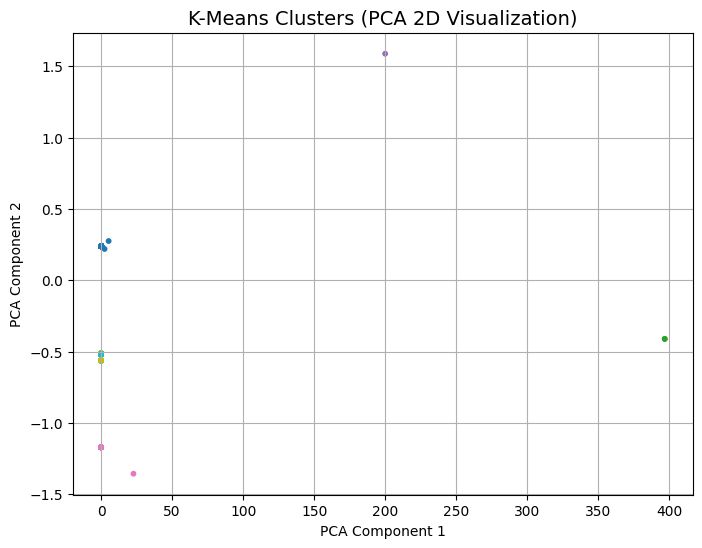

In [12]:
# STEP 9 — PCA Visualization of Clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce feature space to 2 components for visualization
pca = PCA(n_components=2)
pca_points = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(
    pca_points[:, 0],
    pca_points[:, 1],
    c=df_ml['cluster'],
    s=10,         # dot size
    cmap='tab10'  # color palette
)

plt.title("K-Means Clusters (PCA 2D Visualization)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [13]:
# STEP 10 — Save Model, Scaler, Encoder & Final Output

import joblib

# Save trained K-Means model
joblib.dump(model, "kmeans_health_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# Save one-hot encoder
joblib.dump(ohe, "encoder.pkl")

# Save final dataset with clusters
df_ml.to_csv("health_facility_clusters.csv", index=False)

print("All model files and output saved successfully!")


All model files and output saved successfully!


In [14]:
from google.colab import files

files.download("kmeans_health_model.pkl")
files.download("scaler.pkl")
files.download("encoder.pkl")
files.download("health_facility_clusters.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
model.inertia_


2700.8054662609334

In [16]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, model.labels_)
sil_score


np.float64(0.9918242504894863)

In [17]:
df_ml['cluster'].value_counts()


,count
cluster,
0,163062
3,29724
4,6318
5,1251
1,2
2,1


In [18]:
df_ml.groupby('cluster')['Facility Type'].agg(lambda x: x.value_counts().index[0])


,Facility Type
cluster,
0,sub_cen
1,sub_cen
2,sub_cen
3,phc
4,chc
5,s_t_h


In [19]:
df_ml['ActiveFlag_C'].value_counts(normalize=True) * 100


,proportion
ActiveFlag_C,
Y,100.0
